<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#env-set-up" data-toc-modified-id="env-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>env set-up</a></span></li><li><span><a href="#data-exploration" data-toc-modified-id="data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>data exploration</a></span></li><li><span><a href="#sample-plotting" data-toc-modified-id="sample-plotting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>sample plotting</a></span></li></ul></div>

# env set-up

In [1]:
library(repr) ; options(repr.plot.width=18, repr.plot.height= 10) ## change plot default parameter in Jupyter
source("../code/func.R") ## import lib, model, func
rAw = read.csv("../result/maxYield_all.csv", header=T) ## analytical scan
dIs = read.csv("../result/discrepancy.csv", header = T) ## discrepancies scan (analytical solve vs integration)
nUm = cbind(dIs[,1:9],dIs[,10:13]+rAw[,10:13]) ## get back numerical solution
dim(rAw)

[1] 1234321      13

In [2]:
cRaAna = rAw[which(rAw[,12]<=0),] ## data predicted to be negative (bc only B is possible to be negative)
cRaNum = nUm[which(nUm[,10]<=0 | nUm[,11]<=0 | nUm[,12]<=0 | nUm[,13]<=0),] ## data actually not positive

# data exploration
Number of simulations which is actually not positive minus the number predicted being not positive

In [3]:
paste0("actually not positive: ",nrow(cRaNum),"; predicted not positive: ",nrow(cRaAna))

[1] "actually not positive: 77621; predicted not positive: 37212"

number of simulations predicted positive but actually not

In [4]:
dIcN = dIcA = c()
for(i in 1:9){ ## create unique id for filtering
    dIcN = paste0(dIcN,cRaNum[,i])
    dIcA = paste0(dIcA,cRaAna[,i])
};rm(i)
dIsc = cRaNum[which(dIcN%in%dIcA==F),]
dim(dIsc)

[1] 40416    13

# sample plotting

DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 208.31, R2 = 1.39552e-14
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 208.31, R2 = 1.39552e-14
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 208.31, R2 = 1.39552e-14
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 208.31, R2 = 1.39552e-14
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will co

Warning message in lsoda(y, times, func, parms, ...):
“an excessive amount of work (> maxsteps ) was done, but integration was not successful - increase maxsteps”
Warning message in lsoda(y, times, func, parms, ...):
“Returning early. Results are accurate, as far as they go”


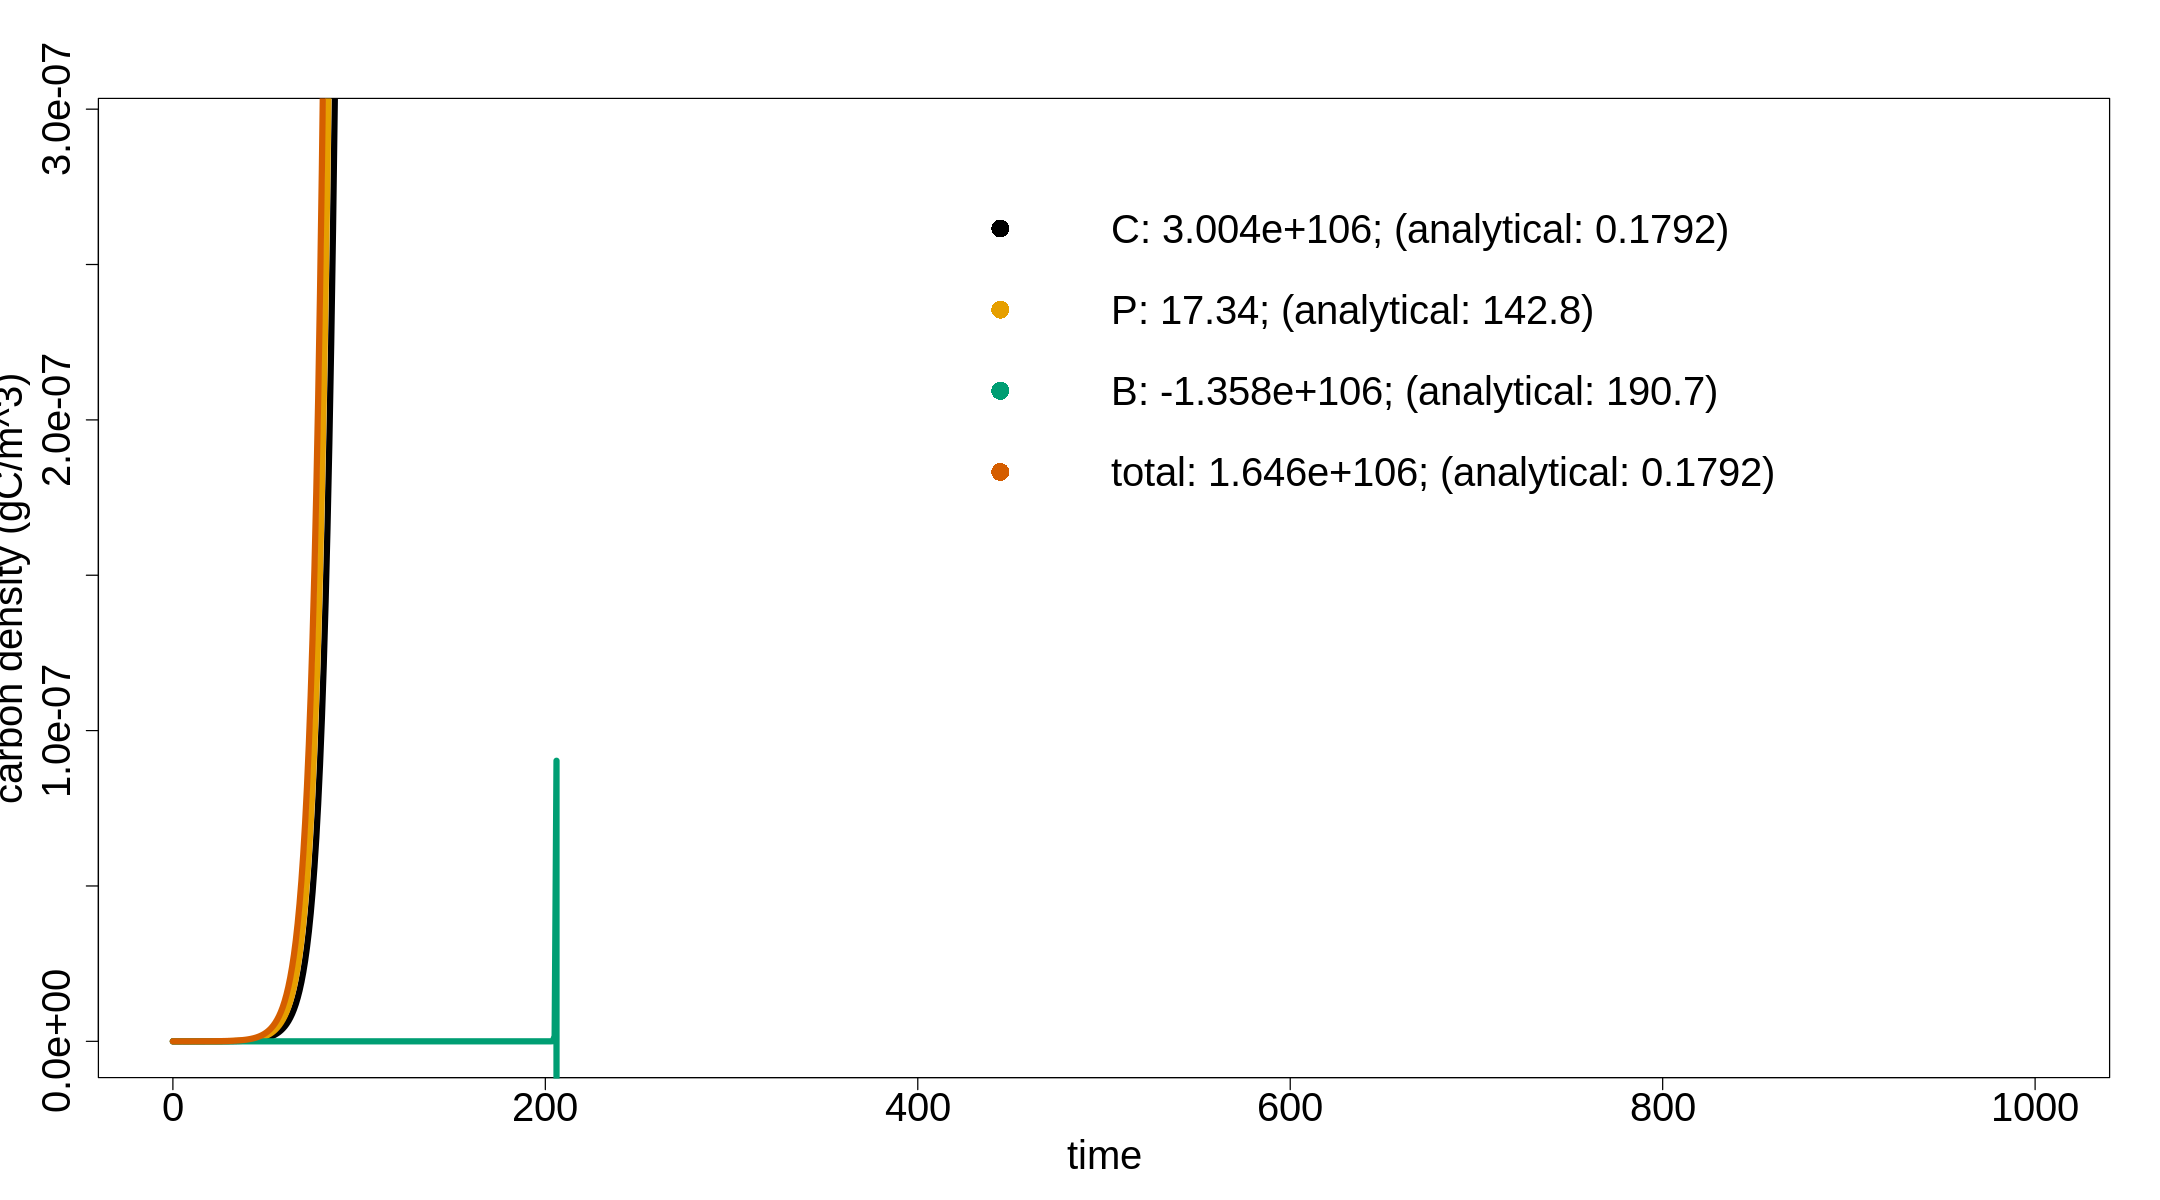

In [36]:
pA = as.numeric(unname(dIsc[1,1:9]))
edTm = 1e3
iPop = 1e-12
rEs = ebcData(endTime=edTm, iniPop=iPop, parameter=pA)
vEc = c()
for(i in 2:ncol(rEs)){vEc = c(vEc,rEs[,i])};rm(i)
ymax = unname(quantile(vEc,prob=.55))
lGd = paste0(colnames(rEs)[-1],": ",signif(rEs[nrow(rEs),-1],4),"; (analytical: ",signif(ebcEqm(pA),4),")")

matplot(rEs[,1],rEs[,-1], type="l", lty=1, lwd=5, col=cBp[-c(3,5)], xlab=colnames(rEs)[1], ylab="carbon density (gC/m^3)", cex.lab=2, cex.axis=2, xlim=c(0,edTm), ylim=c(0,ymax))
legend("topright", inset=c(-.55,.05), legend = lGd, pch = rep(16,3), col = cBp[-c(3,5)], bty="n", cex = 2)